# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Анализ данных

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
print(data.head())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1       

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

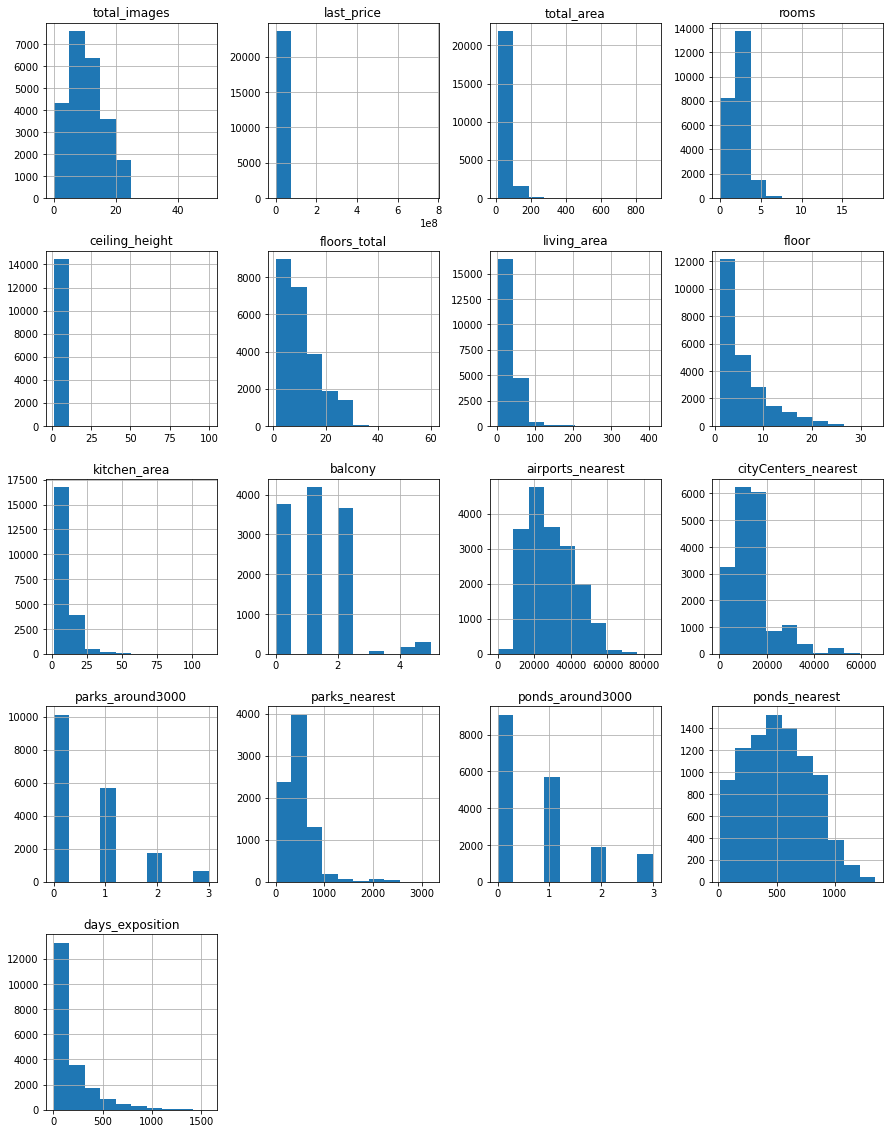

In [5]:
data.hist(figsize=(15, 20))

Чаще всего люди прикрепляют от 5 до 15 фотографий в объявлениях
Больше всего объявлений с квартирами, находящимися с 1 по 10 этаж, с 2-3 комнатами. Чаще всего в квартирах либо 1-2 балкона, либо 0. Жилая площадь в большинстве случаев составаляет от 0 до 40 кв.м., а кухонная от 0 до 12.5 кв.м. Чаще всего парков и прудов поблизости нет.

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В данных досточное кол-во пробелов, которые сложно заменить медианным или средним значениями, такие пропуски встречаются в столбцах с площадью (общей, жилой и кухонной), но заполнение данных пропусков может только испортить исследование. 
Кроме того пропуски встречаются в названиях населенных пунктов, которые также сложно заполнить, это может повлиять на дальнейший расчет стоимости одного километра.
Пропуски в кол-ве близлежащих парков или прудов могут возникать из-за их отсутствия рядом с объектами недвижимости. 


### Предобработка данных

В данных достаточно много пропущенных значений, есть столбцы с некорректным типом данных. Пропуски есть во всех столбцах, кроме total_images, last_price, total_area, first_day_exposition, rooms, floor, studio, open_plan.            

In [7]:
data = data.rename(columns={'balcony' : 'balcony', 'cityCenters_nearest' : 'city_centers_nearest'})

In [8]:
print(data['ceiling_height'].unique())

[  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6
   2.92   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53
   2.74   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82
   3.54   3.53   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9
   3.18   3.35   2.3    3.57   2.48   2.62   2.82   3.98   2.63   3.83
   3.52   3.95   3.75   2.88   3.67   3.87   3.66   3.85   3.86   4.19
   3.24   4.8    4.5    4.2    3.36  32.     3.08   3.68   3.07   3.37
   3.09   8.     3.26   3.34   2.81   3.44   2.97   3.14   4.37   2.68
   3.22   3.27  27.     4.1    2.93   3.46  24.     3.47   3.33   3.63
   3.32  26.     1.2    8.3    2.98   2.86   3.17   4.4    3.28   3.04
   4.45   5

In [9]:
data.loc[(data['ceiling_height'] > 20) & (data['ceiling_height'] < 50), 'ceiling_height'] = \
data['ceiling_height'] / 10

In [10]:
#убираем квартиры с потолкам ниже 2.5 м, т.к. по СНИП минимальная высота 2.5 метров, 
#и больше 10 метров, так как такие объекты скорее являются аномальными.
data['ceiling_height'] = data.loc[(data['ceiling_height'] > 2.5) & (data['ceiling_height'] < 10), 'ceiling_height']
print(data['ceiling_height'].unique())

[2.7   nan 3.03 2.67 2.56 3.05 2.75 2.6  2.9  2.8  2.55 3.   2.65 3.2
 2.61 3.25 3.45 2.77 2.85 2.64 2.57 4.15 3.5  3.3  2.71 4.   2.73 2.84
 3.1  3.4  3.06 2.72 2.54 2.51 2.78 2.76 2.58 3.7  2.52 5.2  2.87 2.66
 2.59 3.6  2.92 3.11 3.13 3.8  3.15 3.55 3.16 3.62 3.12 2.53 2.74 2.96
 5.3  5.   2.79 2.95 4.06 2.94 3.82 3.54 3.53 2.83 4.7  3.38 3.01 5.6
 3.65 3.9  3.18 3.35 3.57 2.62 2.82 3.98 2.63 3.83 3.52 3.95 3.75 2.88
 3.67 3.87 3.66 3.85 3.86 4.19 3.24 4.8  4.5  4.2  3.36 3.08 3.68 3.07
 3.37 3.09 8.   3.26 3.34 2.81 3.44 2.97 3.14 4.37 2.68 3.22 3.27 4.1
 2.93 3.46 3.47 3.33 3.63 3.32 8.3  2.98 2.86 3.17 4.4  3.28 3.04 4.45
 5.5  3.84 3.23 3.02 3.21 3.43 3.78 4.3  3.39 2.69 3.31 4.65 3.56 3.51
 3.93 3.42 2.99 3.49 4.14 2.91 3.88 4.25 3.29 3.76 3.69 6.   2.89 3.58
 5.8  4.9  3.48 3.59]


In [11]:
#заполняем пропуски в столбце ceiling_height медианным значением, т.к. среднее будет некорректным
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
print(data['ceiling_height'].unique())

[2.7  3.03 2.67 2.56 3.05 2.75 2.6  2.9  2.8  2.55 3.   2.65 3.2  2.61
 3.25 3.45 2.77 2.85 2.64 2.57 4.15 3.5  3.3  2.71 4.   2.73 2.84 3.1
 3.4  3.06 2.72 2.54 2.51 2.78 2.76 2.58 3.7  2.52 5.2  2.87 2.66 2.59
 3.6  2.92 3.11 3.13 3.8  3.15 3.55 3.16 3.62 3.12 2.53 2.74 2.96 5.3
 5.   2.79 2.95 4.06 2.94 3.82 3.54 3.53 2.83 4.7  3.38 3.01 5.6  3.65
 3.9  3.18 3.35 3.57 2.62 2.82 3.98 2.63 3.83 3.52 3.95 3.75 2.88 3.67
 3.87 3.66 3.85 3.86 4.19 3.24 4.8  4.5  4.2  3.36 3.08 3.68 3.07 3.37
 3.09 8.   3.26 3.34 2.81 3.44 2.97 3.14 4.37 2.68 3.22 3.27 4.1  2.93
 3.46 3.47 3.33 3.63 3.32 8.3  2.98 2.86 3.17 4.4  3.28 3.04 4.45 5.5
 3.84 3.23 3.02 3.21 3.43 3.78 4.3  3.39 2.69 3.31 4.65 3.56 3.51 3.93
 3.42 2.99 3.49 4.14 2.91 3.88 4.25 3.29 3.76 3.69 6.   2.89 3.58 5.8
 4.9  3.48 3.59]


In [12]:
#заполнили пропуски в столбце balcony, заменили их на 0, 
#т.к. предполагаем, что если информация о балконе отсутсвует, то это значит, что балкона в квартире нет. 
#И изменим тип столбца на целочисленный
data['balcony'] = data['balcony'].fillna('0')
data['balcony'] = data['balcony'].astype('int')
print(data['balcony'].value_counts())

0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: balcony, dtype: int64


In [13]:
data.loc[data['balcony'] > data['rooms'], 'balcony'] = data['rooms'].mean()
print(data['balcony'].unique())

[0.         2.07063589 1.         2.         3.         4.
 5.        ]


In [14]:
#убираем выбросы в столбце floors_total
data['floors_total'] = data.loc[data['floors_total'] <29, 'floors_total']
print(data['floors_total'].median())
data.isna().sum()
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())
data['floors_total'] = data['floors_total'].astype('int')
print(data['floors_total'].value_counts())

9.0
5     5788
9     3880
16    1376
12    1362
4     1200
10    1174
25    1075
6      914
17     833
3      668
7      592
14     553
18     505
24     469
8      390
2      383
15     365
23     352
19     339
22     286
20     271
13     229
11     203
27     164
21     158
26     124
1       25
28      21
Name: floors_total, dtype: int64


Удаляем квартиры с жилой площадью и площадью кухни меньше 8 кв. м., такое подобные противоречат нормам снип, также избавляемся от объектов, где жилая площадь больше 250 кв.м. и площадь кухни больше 60 кв.м., т.к. при изучении гистограмм можно заметить, что объекты с подобной квадратурой скорее являются аномалиями и могут исказить исследование 


In [15]:
data['total_area'] = data.loc[data['total_area'] <= 400, 'total_area']
data['living_area'] = data.loc[(data['living_area'] > 8) & (data['living_area'] <= 250), 'living_area']
data['kitchen_area'] = data.loc[(data['kitchen_area'] > 8) & (data['kitchen_area'] <= 60), 'kitchen_area']


In [16]:
print(data['total_area'].sort_values())

19904    12.0
19807    13.0
17961    13.0
19546    13.0
19558    13.2
         ... 
19540     NaN
20273     NaN
21955     NaN
22131     NaN
22494     NaN
Name: total_area, Length: 23699, dtype: float64


Убираем квартиры с количеством комнат больше 9, так как, если посмотреть на данные, то это скорее аномальные данные, которые могут испортить исследование, а пропуски и 0 меняем на 1, т.к. в любом случае в квартире есть хотя бы одна комната

In [17]:
#data['rooms'] = data.loc[data['rooms'] <= 5, 'rooms']
#data.loc[data['rooms'] == 0, 'rooms'] = 1
#data['rooms'] = data['rooms'].fillna(1)
#print(data['rooms'].unique())

<AxesSubplot:>

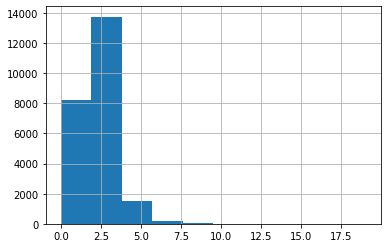

In [18]:
data['rooms'].hist()

Убираем выброс - квартиру с ценой в 12 тысяч

In [19]:
data['last_price'] = data.loc[data['last_price'] > 13000, 'last_price']

In [20]:
#изменяем тип данных столбца is_apartment, сразу исчезают пропуски
data['is_apartment'] = data['is_apartment'].astype('bool')
print(data['is_apartment'])
print(data['is_apartment'].unique())

0        True
1        True
2        True
3        True
4        True
         ... 
23694    True
23695    True
23696    True
23697    True
23698    True
Name: is_apartment, Length: 23699, dtype: bool
[ True False]


In [21]:
#Заменены все дубликаты
data['locality_name'] = data['locality_name'].str.lower().str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'городской поселок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок мурино', 'мурино')
data['locality_name'] = data['locality_name'].str.replace('село рахья', 'рахья')
data['locality_name'] = data['locality_name'].str.replace('поселок гарболово', 'деревня гарболово')
data['locality_name'] = data['locality_name'].str.replace('поселок зимитицы', 'деревня зимитицы')
data['locality_name'] = data['locality_name'].str.replace('поселок калитино', 'деревня калитино')
data['locality_name'] = data['locality_name'].str.replace('деревня кузьмолово', 'поселок кузьмоловский')
data['locality_name'] = data['locality_name'].str.replace('поселок павлово', 'деревня павлово')
data['locality_name'] = data['locality_name'].str.replace('поселок рабитицы', 'деревня рабитицы')
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции вещево', 'поселок станции вещево')
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции приветнинское', 'поселок станции приветнинское')
data['locality_name'] = data['locality_name'].str.replace('поселок федоровское', 'деревня федоровское')
print(data['locality_name'].unique())

['санкт-петербург' 'поселок шушары' 'поселок янино-1' 'поселок парголово'
 'мурино' 'ломоносов' 'сертолово' 'петергоф' 'пушкин' 'деревня кудрово'
 'коммунар' 'колпино' 'поселок красный бор' 'гатчина'
 'деревня федоровское' 'выборг' 'кронштадт' 'кировск'
 'деревня новое девяткино' 'поселок металлострой' 'поселок лебяжье'
 'поселок сиверский' 'поселок молодцово' 'поселок кузьмоловский'
 'садовое товарищество новая ропша' 'павловск' 'деревня пикколово'
 'всеволожск' 'волхов' 'кингисепп' 'приозерск' 'сестрорецк'
 'деревня куттузи' 'поселок аннино' 'поселок ефимовский'
 'поселок плодовое' 'деревня заклинье' 'поселок торковичи'
 'поселок первомайское' 'красное село' 'поселок понтонный' 'сясьстрой'
 'деревня старая' 'деревня лесколово' 'поселок новый свет' 'сланцы'
 'село путилово' 'ивангород' 'шлиссельбург' 'никольское' 'зеленогорск'
 'сосновый бор' 'деревня оржицы' 'деревня кальтино' 'кудрово'
 'поселок романовка' 'поселок бугры' 'поселок рощино' 'кириши' 'луга'
 'волосово' 'отрадное' 'село

!НОВЫЙ ВЫВОД!

Были проанализированы данные и найдены аномалии в них. Так, была исключена недвижимость с исключительно низкой стоимостью (в примерно 12 тысяч). Были исключены квартиры с потолками с высотой меньше 2.5 метров и больше 10 метров, пропуски были заполнены медианным значением. Объекты, в которых этажей больше 29 также были исключены, во-первых, Санкт-Петербург не является городом с огромным кол-ом многоэтажных домов и некоторые из находящихся в наборе данных объектов просто не были правдоподобными, а другие исключенные просто являлись аномальными и могли навредить результатам исследования. Были проанализированы названия населенных пунктов и удалены дубликаты. Также были удалены объекты, площадь которых противоречила нормам снипа. 

### Посчитайте и добавьте в таблицу новые столбцы

In [22]:
#добавляем столбец с ценой одного квадратного метра 
data['metr_price'] = data['last_price']/data['total_area']
print(data['metr_price'])

0        120370.370370
1         82920.792079
2         92785.714286
3        408176.100629
4        100000.000000
             ...      
23694     72490.845228
23695     52542.372881
23696     44091.710758
23697    149511.400651
23698     41795.665635
Name: metr_price, Length: 23699, dtype: float64


In [23]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

In [24]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
print(data.head())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
3             0  64900000.0       159.0           2015-07-24      3   
4             2  10000000.0       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70            16         51.0      8          True  ...   
1            2.70            11         18.6      1          True  ...   
2            2.70             5         34.3      4          True  ...   
3            2.70            14          NaN      9          True  ...   
4            3.03            14         32.0     13          True  ...   

   city_centers_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0               16028.0               1.0         

In [25]:
def floor_type(row):
    try:
        if row['floor'] == 1:
            return 'первый'
        elif row['floor'] == row['floors_total']:
            return 'последний'
        elif row['floor'] == row['floor'] & row['floor'] != 1 & row['floor'] != row['floors_total']: 
            return 'другой'
    except:
        pass

In [26]:
data['floor_type'] = data.apply(floor_type, axis=1)
print(data['floor_type'].unique())

['другой' 'первый' 'последний']


In [27]:
data['city_centers_nearest_km'] = data['city_centers_nearest']//1000
print(data['city_centers_nearest_km'])

0        16.0
1        18.0
2        13.0
3         6.0
4         8.0
         ... 
23694     4.0
23695     NaN
23696     NaN
23697    10.0
23698     NaN
Name: city_centers_nearest_km, Length: 23699, dtype: float64


### Проведите исследовательский анализ данных

Большинство квартир имеют площадь от 25 кв.м. до 75 кв.м., больших квартир (с площадью больше 100 кв.м.) достаточно мало.

<AxesSubplot:>

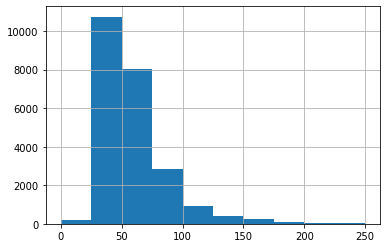

In [28]:
data['total_area'].hist(range=(0, 250))

Жилая площадь в квартирах чаще всего занимает примерно от 8 кв.м. до 25 кв.м., 

<AxesSubplot:>

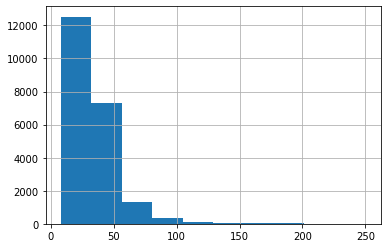

In [29]:
data['living_area'].hist(range=(8,250))

Чаще всего площадь кухни равна от 8 до примерно 13 кв.м.

<AxesSubplot:>

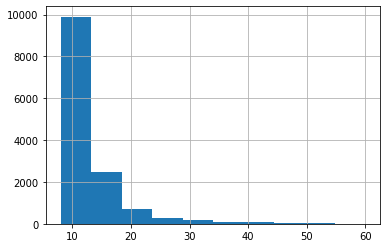

In [30]:
data['kitchen_area'].hist()

!ПЕРЕДЕЛАННАЯ ГИСТОГРАММА!

Больше всего квартир с ценой от 3 до 5 млн. Крайне редко встречаются квартиры, которые стоят до 1 млн. Примерно с равной частотой встречаются квартиры, цена которых колеблется от 1.5 до примерно 3 млн и от 6.5 до 8 млн. 

<AxesSubplot:>

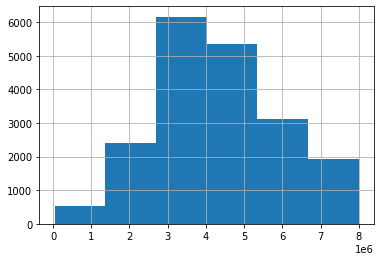

In [40]:
data['last_price'].hist(range=(40000,8000000),bins=6)

В исследовании преобладают квартиры, в которых одна, две или три комнаты, а также те, в которых их 0, то есть квартиры-студии или квартиры со свободной планировкой

<AxesSubplot:>

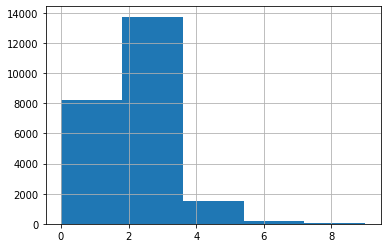

In [38]:
data['rooms'].hist(range=(0,9), bins=5)

Чаще всего в домах высота потолков колеблется от 2.5 м до примерно 2.7, потолки с большей высотой скорее являются исключениями

<AxesSubplot:>

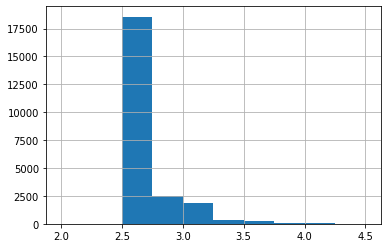

In [33]:
data['ceiling_height'].hist(range=(2, 4.5))

Большинство квартир из представленных в исследовании, находятся на 1-4 этажах, относительно небольшое в совокупности кол-во квартир находится с 10 по 26 этаж

<AxesSubplot:>

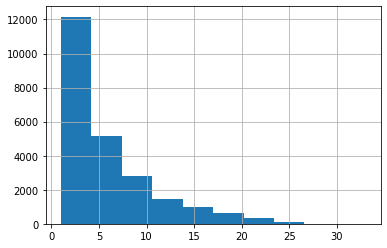

In [35]:
data['floor'].hist()

Очень мало квартир находятся на первом или последнем этаже, большинство все-таки находится на промежуточных. 

<AxesSubplot:>

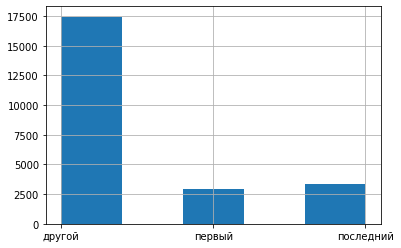

In [42]:
data['floor_type'].hist(bins=5)

Чаще всего встречаются квартиры в домах с 4-7 этажами, что характерно для СПб, так как многоэтажки здесь начали появляться относительно недавно.

<AxesSubplot:>

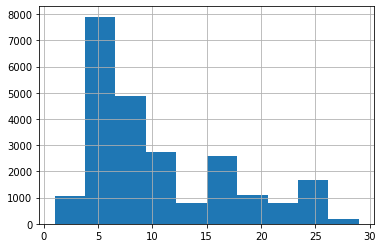

In [23]:
data['floors_total'].hist(range=(1,29), bins=10)

Большая часть квартир находится в пределах 20 км от центра

<AxesSubplot:>

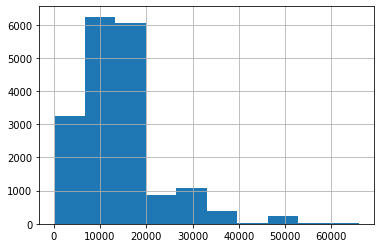

In [40]:
data['city_centers_nearest'].hist()

Ближайший аэропорт у большинства квартир находится в 18-25 км,крайне мало квартир, у которых аэропорт в 60-80 км от них, скорее всего такие квартиры находится не в самом СПб, а за пределами

<AxesSubplot:>

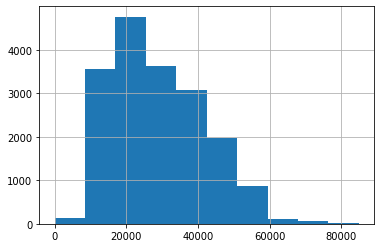

In [41]:
data['airports_nearest'].hist()

Чаще всего парки находятся в радиусе от 0 до 600 метров от квартиры, что является достаточно небольшим расстоянием

<AxesSubplot:>

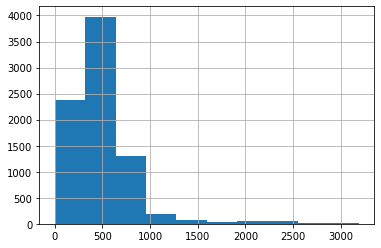

In [43]:
data['parks_nearest'].hist()

Чаще всего объявления размещаются в будние дни

<AxesSubplot:>

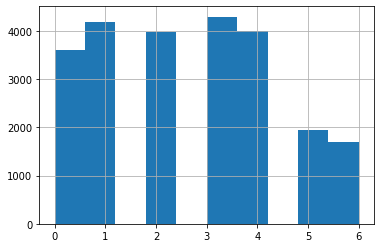

In [44]:
data['weekday'].hist()

С 2014 года кол-во объявлений значительно выросло, особенно с 2017 по 2019 года

<AxesSubplot:>

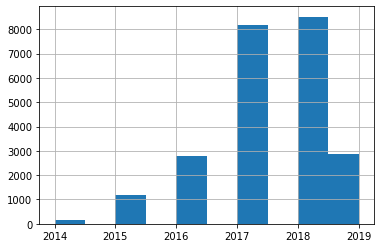

In [45]:
data['year'].hist()

В среднем продажа занимает порядка 180 дней, то есть где-то 6 месяцев
Если смотреть на гистограму, то можно сказать, что большинство квартир продается как раз в переиод до ~180 дней, такой срок продажи можно назвать быстрым
А все квартиры, которые продаются дольше 400 дней, то есть дольше года можно отнести к необычно долгим.
В то же время скорость продажи может различаться для квартир с разным количеством комнат или квадратурой, можно предположить, что все-таки быстрее продаются квартиры с одной комнатой. 


<AxesSubplot:>

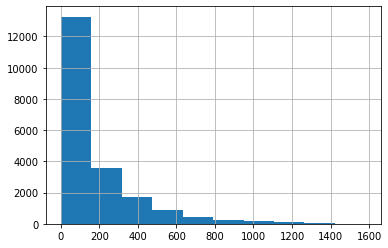

In [46]:
data['days_exposition'].hist()

In [47]:
print(data['days_exposition'].median())
print(data['days_exposition'].mean())

95.0
180.88863436982163


По графику, несмотря на достаточно скачкообразный характер, можно заметить, что чем больше квадратура, тем выше цены.
Коэффициент корреляция показывает, что связть между показателями есть, и она относительно сильная

0.6250109643230578


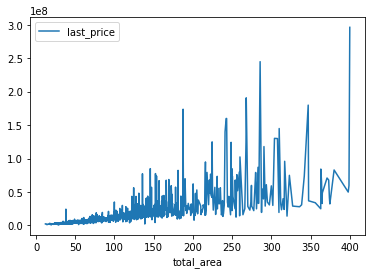

In [48]:
data.pivot_table(index='total_area', values='last_price').plot()
print(data['last_price'].corr(data['total_area']))

Между ценой и жилой площадью некоторая взаимосвязь прослеживается, так как скачок в цене происходит у квартир с жилой площадью больше 200 кв.м., и небольшой скачок у объектов, площадь которых примерно 180 кв.м. То есть, чем больше жилая площадь, тем выше цена. Подтверждает это и коэффициент корреляция, он равен 0.545, то есть связь есть, но все-таки не очень сильная. 

0.5454865225248119


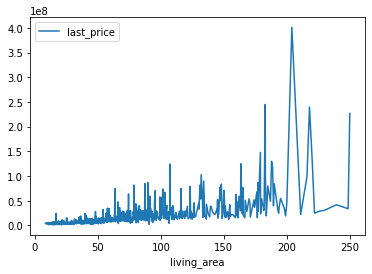

In [49]:
data.pivot_table(index='living_area', values='last_price').plot()
print(data['last_price'].corr(data['living_area']))

Скачки в цене присутствуют при разной кухонной квадратуре, сложно говорить о присутсвии какой-либо взаимосвязи между площадью кухни и ценой.
Коэффициент корреляции в то же время указывает на то, что слабая связь все же присутсвует.

0.45528927060324187


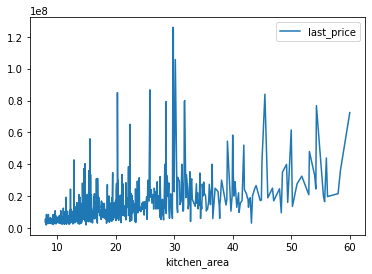

In [50]:
data.pivot_table(index='kitchen_area', values='last_price').plot()
print(data['last_price'].corr(data['kitchen_area']))

Если посмотреть на график, то можно смело говорить, что чем больше комнат, тем выше цена на объект
Однако, корреляция достаточно слабая.

0.23520797759264175


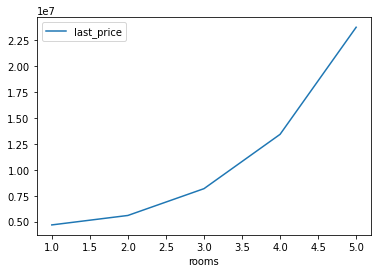

In [51]:
data.pivot_table(index='rooms', values='last_price').plot()
print(data['last_price'].corr(data['rooms']))

Цена ниже всего на квартиры, которые находятся на первом этаже

<AxesSubplot:xlabel='floor_type'>

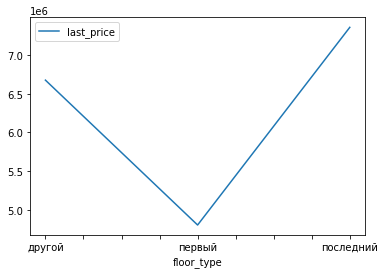

In [52]:
data.pivot_table(index='floor_type', values='last_price').plot()

Самые "дорогие" объеявления размещаются в субботу, а самые "дешевые" в воскресенье.

<AxesSubplot:xlabel='weekday'>

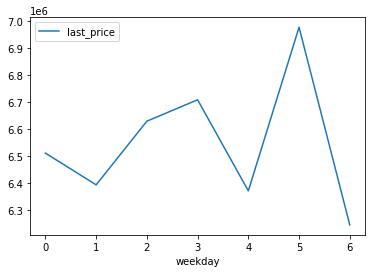

In [53]:
data.pivot_table(index='weekday', values='last_price').plot()

Квартиры, которые размещаются в декабре, имеют самую высокую цену, а те, которые размещаются в ноябре, самую низкую. Но о как таковой взаимосвязи говорить сложно.

<AxesSubplot:xlabel='month'>

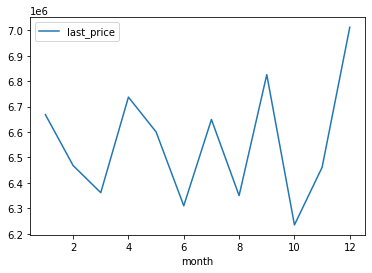

In [54]:
data.pivot_table(index='month', values='last_price').plot()

С 2014 года квартиры заметно упали в цене.

<AxesSubplot:xlabel='year'>

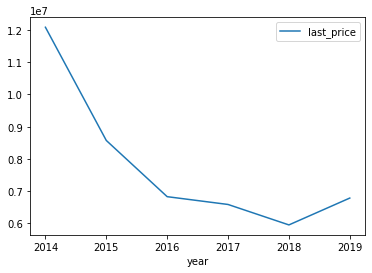

In [55]:
data.pivot_table(index='year', values='last_price').plot()

<AxesSubplot:xlabel='locality_name'>

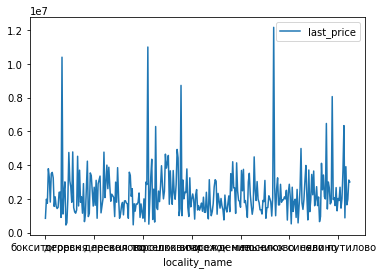

In [65]:
data.pivot_table(index='locality_name', values='last_price', aggfunc='mean').plot()

In [64]:
top_10_localities = data['locality_name'].value_counts().head(10)

locality_m_price = data.pivot_table(index='locality_name', values='metr_price', aggfunc=['count', 'mean'])
locality_m_price.columns  =['count_values', 'mean_price_m']
locality_m_price = locality_m_price.sort_values(by='count_values', ascending=False).head(10)
locality_m_price
#locality_m_price.join(top_10_localities, on='locality_name')

,count_values,mean_price_m
locality_name,,
санкт-петербург,15697,114663.997787
мурино,590,86087.512050
поселок шушары,440,78677.364217
всеволожск,398,68654.473986
пушкин,369,103125.819291
колпино,338,75424.579098
поселок парголово,327,90175.913458
гатчина,307,68746.146763
деревня кудрово,299,92473.547576


Чем ближе к центру находится объект недвижимости, тем выше его цена
Замечен небольшой скачок в цене у объектов, находящихся в 25-30 км от центра, тем не менее, он незначителен, и цена не превышает 1 млн. 

<AxesSubplot:xlabel='city_centers_nearest_km'>

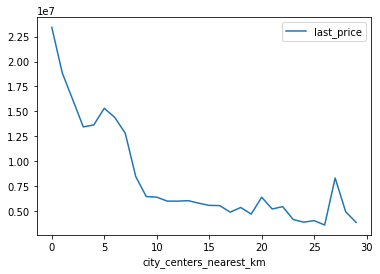

In [56]:
data.query('locality_name == "санкт-петербург"').\
pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean').plot()

### Общий вывод

В процессе исследования было выявлено, что большинство квартир имеют площадь от 25 до 75 кв.м., жилая площадь от 8 до 25 кв.м., кухни - 8-13 кв.м. с потолками от 2.5 до 2.7 м. Большинство квартир расположено на промежуточных между первым и последним этажами.
Квартиры чаще всего продаются за 6 месяцев.
Что касается, взаимосвязи между показателями и ценой квартиры, было получены дальнейшие выводы:
- связь между ценой и общей площадью явно присутсвует, коэффициент корреляции равен 0.625
- несмотря на коэффициент корреляция, по графику видно, что чем больше в квартире комнат, тем выше на квартиру цена
- при изучении графика о распределении цены на квартиры по годам, можно заметить, что с 2014 года цены значительно упали
- чем дальше от центра находится квартира, тем дешевле ее цена
- 